In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/Users/Admin/Desktop/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#spending score analysis

In [5]:
df.describe().applymap('{:,.2f}'.format)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


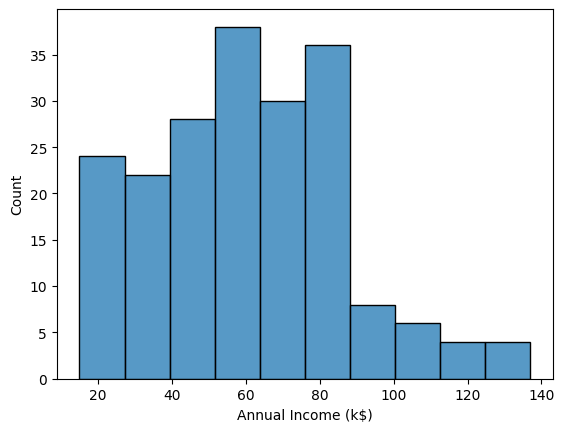

In [6]:
sns.histplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']

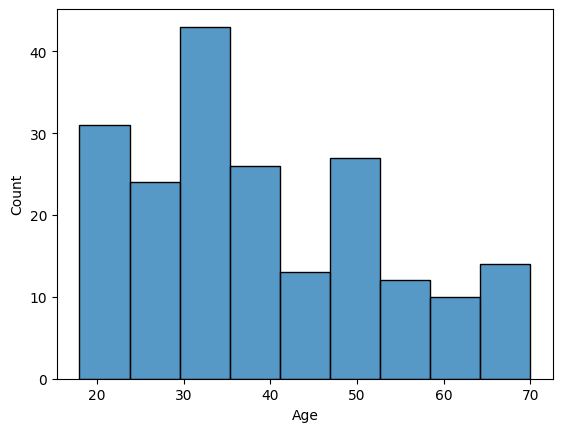

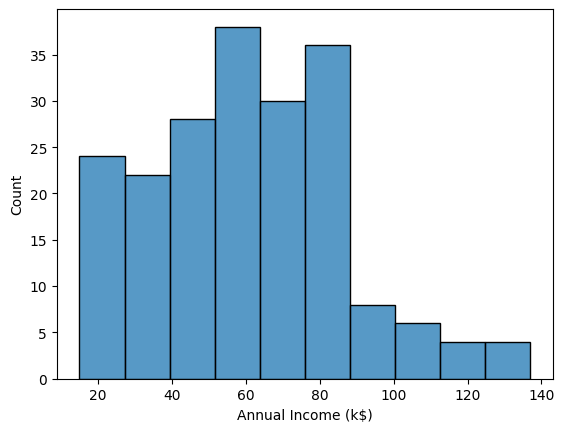

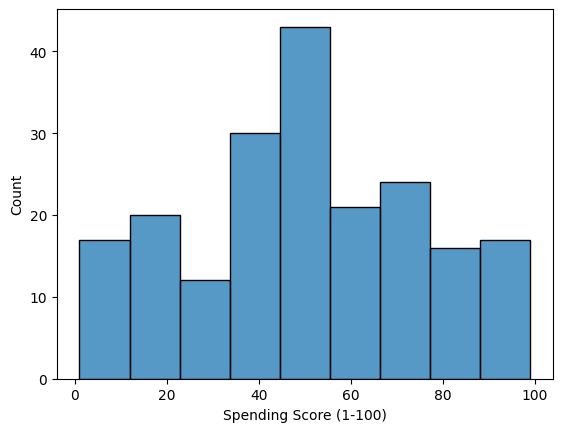

In [9]:
for i in columns:
    plt.figure()
    sns.histplot(df[i]);

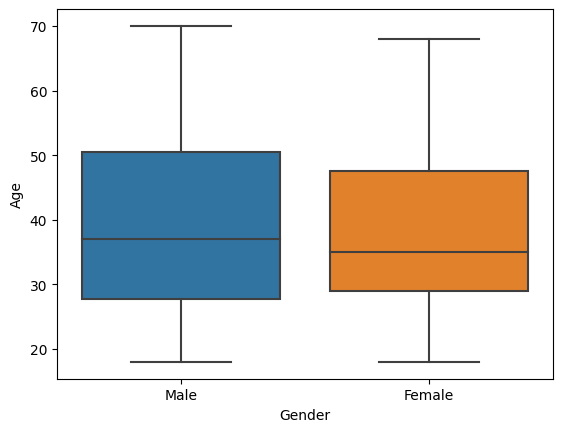

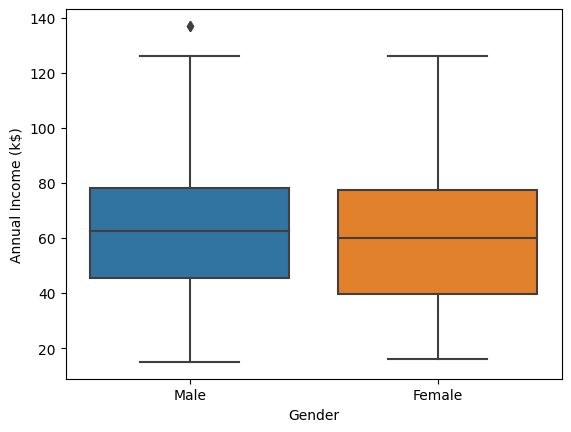

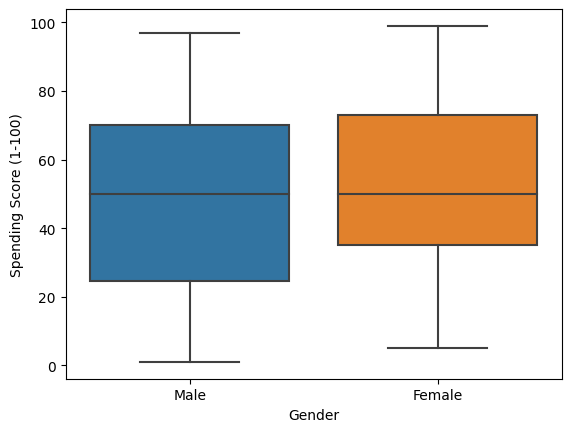

In [10]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x=df['Gender'],y=df[i])

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#
TWO VARIABLES ANALYSIS

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

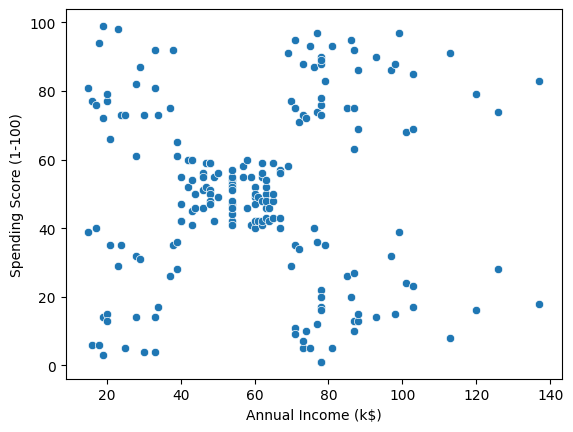

In [12]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

In [13]:
#df=df.drop('CustomerID',axis=1)

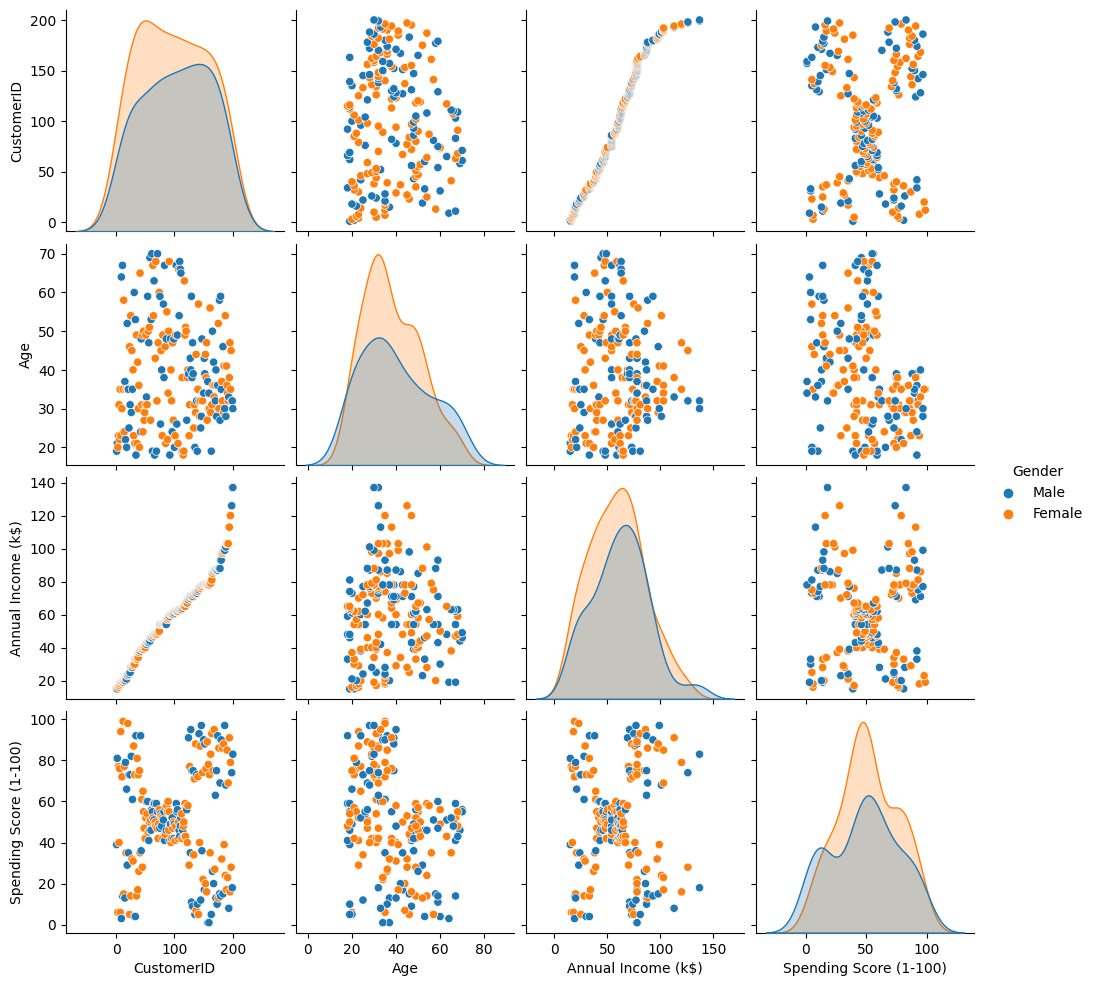

In [14]:
sns.pairplot(df,hue='Gender')

In [15]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
numerical_df=df.select_dtypes(include=['float64','int64'])

In [17]:
numerical_df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

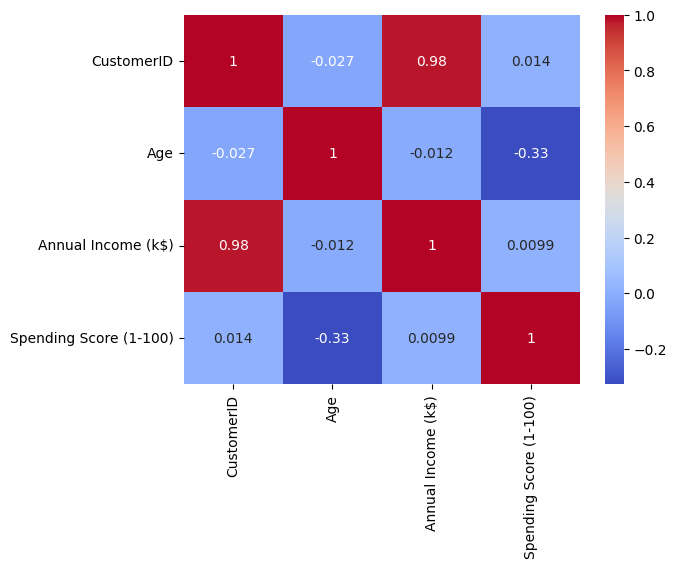

In [18]:
sns.heatmap(numerical_df.corr(),annot=True,cmap='coolwarm')

#
CLUSTERING

In [19]:
clustering1=KMeans(n_clusters=3)

In [20]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [22]:
df['Income Cluster']=clustering1.labels_

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [24]:
df['Income Cluster'].value_counts()

Income Cluster
1    90
0    74
2    36
Name: count, dtype: int64

In [25]:
clustering1.inertia_

23517.330930930933

In [26]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [27]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 24354.29264033264,
 13278.112713472485,
 8481.496190476191,
 5050.9047619047615,
 3936.7968253968256,
 2871.629365079366,
 2251.6016095016093,
 1780.4305544129074]

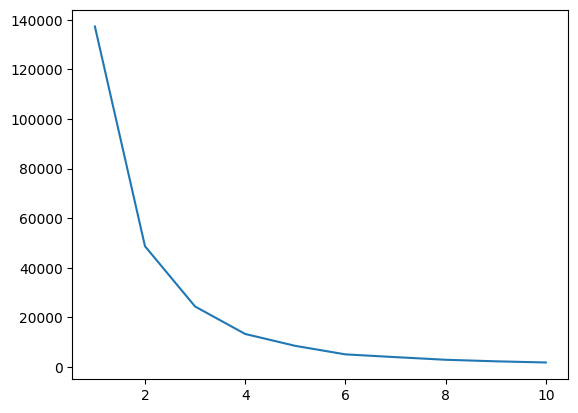

In [28]:
plt.plot(range(1,11),inertia_scores)

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [30]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [31]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0


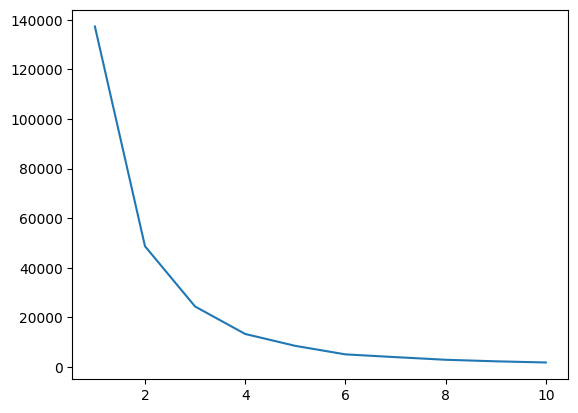

In [32]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores)

In [33]:
df.groupby(['Spending and Income'])[['Age','Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [34]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,86.538462,82.128205
3,88.200000,17.114286
4,25.727273,79.363636


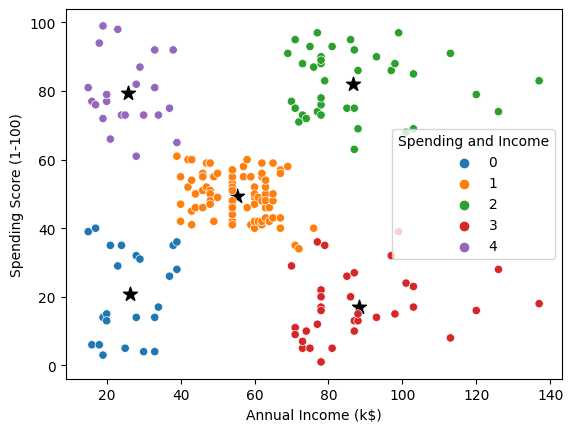

In [88]:
plt.scatter(x=centers['x'],y=centers['y'],s=110,c='black',marker='*')

sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income',palette='tab10')
plt.savefig('Anlaysis on income and spending.png')

In [36]:
pd.crosstab(df['Spending and Income'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.590909,0.409091


In [37]:
df.groupby(['Spending and Income'])[['Age','Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scale=StandardScaler()

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0


In [73]:
new_df=pd.get_dummies(data=df,dtype='int64',drop_first=True)
new_df.rename(columns={'Gender_Male':'Gender'},inplace=True)
new_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income,Gender
0,1,19,15,39,0,0,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,0,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,0,0


In [74]:
type(new_df)

pandas.core.frame.DataFrame

In [75]:
new_df=new_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']]
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [84]:
new_df1=scale.fit_transform(new_df)

In [85]:
new_df1=pd.DataFrame(new_df)
new_df1.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


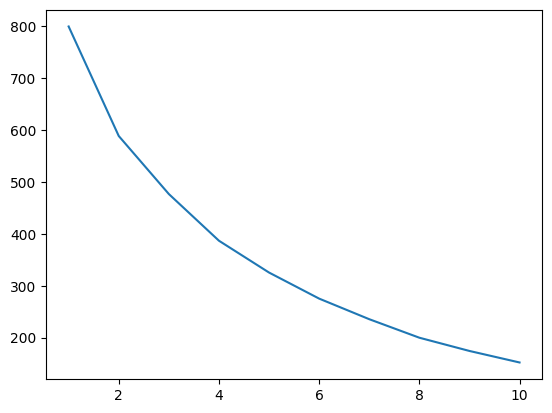

In [87]:
inertia_score3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(new_df1)
    inertia_score3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_score3)